## **CIFAR-10**

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

In [ ]:
# define the architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# train the model using SGD
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", 
              optimizer=sgd,
	            metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=20, batch_size=64)

Epoch 1/20
782/782 [==============================] - 34s 42ms/step - loss: 2.2587 - accuracy: 0.1658 - val_loss: 2.2230 - val_accuracy: 0.1969
Epoch 2/20
782/782 [==============================] - 30s 38ms/step - loss: 2.1581 - accuracy: 0.2357 - val_loss: 2.1150 - val_accuracy: 0.2355
Epoch 3/20
782/782 [==============================] - 31s 40ms/step - loss: 2.0709 - accuracy: 0.2706 - val_loss: 2.0377 - val_accuracy: 0.2687
Epoch 4/20
782/782 [==============================] - 29s 37ms/step - loss: 2.0094 - accuracy: 0.2899 - val_loss: 1.9937 - val_accuracy: 0.2875
Epoch 5/20
782/782 [==============================] - 29s 37ms/step - loss: 1.9672 - accuracy: 0.3041 - val_loss: 1.9540 - val_accuracy: 0.2832
Epoch 6/20
782/782 [==============================] - 29s 37ms/step - loss: 1.9369 - accuracy: 0.3140 - val_loss: 1.9253 - val_accuracy: 0.3221
Epoch 7/20
782/782 [==============================] - 29s 37ms/step - loss: 1.9144 - accuracy: 0.3232 - val_loss: 1.9088 - val_accuracy:

In [ ]:
# evaluate the network
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

157/157 [==============================] - 2s 15ms/step
              precision    recall  f1-score   support

    airplane       0.34      0.62      0.44      1000
  automobile       0.49      0.37      0.42      1000
        bird       0.25      0.30      0.27      1000
         cat       0.29      0.18      0.22      1000
        deer       0.37      0.20      0.26      1000
         dog       0.34      0.33      0.33      1000
        frog       0.35      0.54      0.42      1000
       horse       0.43      0.39      0.41      1000
        ship       0.48      0.35      0.40      1000
       truck       0.47      0.45      0.46      1000

    accuracy                           0.37     10000
   macro avg       0.38      0.37      0.36     10000
weighted avg       0.38      0.37      0.36     10000



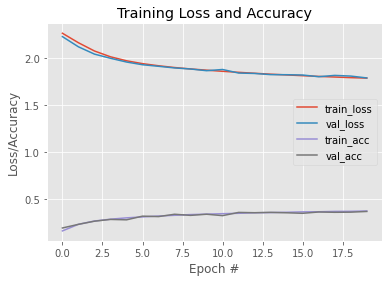

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()